In [14]:
'''
Run a hyperparameter search over the doc2vec model! 
'''

from Corpora import MovieReviewCorpus
from Lexicon import SentimentLexicon
from Statistics import SignTest
from Classifiers import NaiveBayesText, SVMText
from Extensions import SVMDoc2Vec, DocFeaturizer


from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models.doc2vec import Doc2Vec
from sklearn.decomposition import PCA
import seaborn as sns

ax_size = 16
title_size=18

save_dir = "doc2vec_models/"
import os
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
good = ["good", "great","amazing","best"]
bad = ["avoid","boring","terrible","bad"]
extreme = ["incredibly", "particularly", "very"] # e.g., extreme words, or neutral
neutral = ["the", "a", "but"]

# model_pth= f"{save_dir}sample_model.pkl"
# DF.model.save(model_pth)

corpus=MovieReviewCorpus(stemming=False,pos=False,use_imdb=True)
mini_corpus=MovieReviewCorpus(stemming=False,pos=False,use_imdb=False)

num train: 25000, num test: 25000
tot num reviews: 50000
num train: 1800, num test: 200
tot num reviews: 2000


In [108]:

# feature_dim = 100
# window = 3
# epochs = 50
# DF = DocFeaturizer(feature_dim, window, dm=0, dbow_words=1, dm_concat=0)
# # DF.train_model(corpus.train, epochs)
# # SVMDV=SVMDoc2Vec(model=DF,bigrams=False,trigrams=False,discard_closed_class=False)
# # SVMDV.train(corpus.train)

# model = Doc2Vec.load(f"{save_dir}mini_data_model.pkl")
# wv = model.wv
# dv= model.dv
# vocab = list(model.wv.index_to_key)
# X = wv[vocab]

feature_dim = 200
window = 5
epochs = 100
DF = DocFeaturizer(feature_dim, window, dm=0, dbow_words=1, dm_concat=0)
# DF.train_model(corpus.train, epochs)
# SVMDV=SVMDoc2Vec(model=DF,bigrams=False,trigrams=False,discard_closed_class=False)
# SVMDV.train(corpus.train)

model = Doc2Vec.load(f"{save_dir}sample_model.pkl")
wv = model.wv
dv= model.dv
vocab = list(model.wv.index_to_key)
X = wv[vocab]

In [25]:
# !pip3 install testfixtures


     |████████████████████████████████| 95 kB 4.0 MB/s eta 0:00:01


In [26]:
# help from: https://github.com/RaRe-Technologies/gensim/blob/3c3506d51a2caf6b890de3b1b32a8b85f7566ca5/docs/notebooks/doc2vec-IMDB.ipynb
# cite original paper showing combined = better
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec


In [ ]:
'''
analyses to run 
vector addition (see pg 4 of orig doc2vec paper -- analogies) ex. pv(lady gaga) - wv(american) + wv(japanese) = japanese version of lady gaga

'''



In [35]:
dv

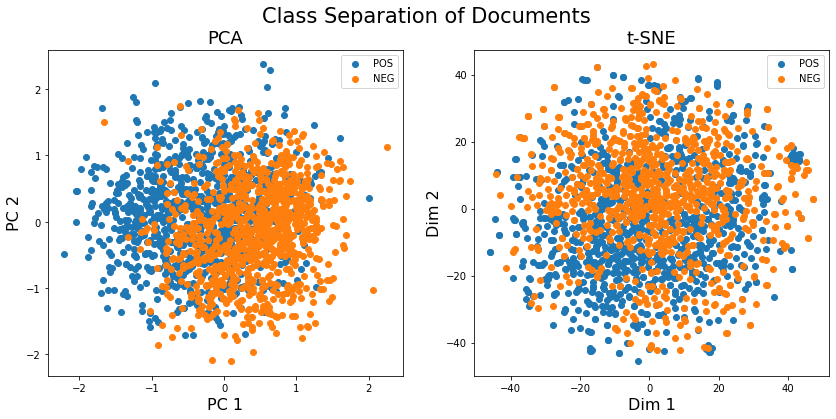

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Class Separation of Documents', fontsize=title_size + 3)

corpus_to_plot = mini_corpus # TODO: change to be the IMDB corpus!!!!

labels = [label for label, _ in corpus_to_plot.train]
dv = model.dv
doc_ids = list(range(len(dv)))
X_docs = dv[doc_ids]
neg_ids = labels.index("NEG")

ax = axes[0]

pca_docs = PCA(n_components=2)
X_pca_docs = pca_docs.fit_transform(X_docs)
# plot positive and negative separately
ax.scatter(X_pca_docs[:neg_ids, 0], X_pca_docs[:neg_ids, 1],label="POS")
ax.scatter(X_pca_docs[neg_ids:, 0], X_pca_docs[neg_ids:, 1],label="NEG")
ax.legend()
ax.set_xlabel("PC 1",fontsize=ax_size)
ax.set_ylabel("PC 2",fontsize=ax_size)
ax.set_title(f"PCA",fontsize=title_size) 
ax.legend()


ax = axes[1]

tsne_docs = TSNE(n_components=2)
X_tsne_docs = tsne_docs.fit_transform(X_docs)
# plot positive and negative separately
ax.scatter(X_tsne_docs[:neg_ids, 0], X_tsne_docs[:neg_ids, 1],label="POS")
ax.scatter(X_tsne_docs[neg_ids:, 0], X_tsne_docs[neg_ids:, 1],label="NEG")
ax.legend()
ax.set_xlabel("Dim 1",fontsize=ax_size)
ax.set_ylabel("Dim 2",fontsize=ax_size)
ax.set_title(f"t-SNE",fontsize=title_size) 
ax.legend()

plt.savefig(f"dimRedIMDB.png", dpi=400, bbox_inches="tight")

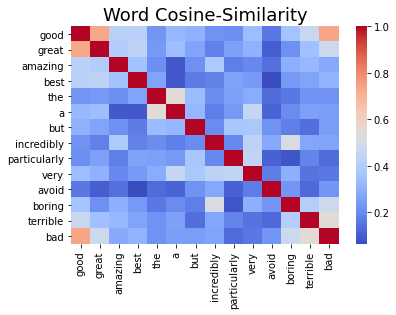

In [45]:
import numpy as np
sample_words = good + neutral + extreme + bad
V = len(sample_words)
sims = np.zeros([V, V])
for i, w_i in enumerate(sample_words):
    for j, w_j in enumerate(sample_words):
        sims[i][j] = wv.similarity(w_i, w_j)
        
fig, ax = plt.subplots()
sns.heatmap(sims,xticklabels=sample_words, yticklabels=sample_words,cmap="coolwarm",ax=ax)
# ax.set_xlabel("Word",fontsize=ax_size)
# ax.set_ylabel("Word",fontsize=ax_size)
ax.set_title(f"Word Cosine-Similarity",fontsize=title_size) 
plt.savefig(f"wordSim.png", dpi=400, bbox_inches="tight") # TODO: repeat this for the original training set case too!! 

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Word Embedding Dimensionality Reduction', fontsize=title_size + 3)

corpus_to_plot = mini_corpus # TODO: change to be the IMDB corpus!!!!

wv = model.wv
word_ids = list(range(len(wv)))
X_words = wv[word_ids]

ax = axes[0]

pca_words = PCA(n_components=2)
X_pca_words = pca_words.fit_transform(X_words)
# plot positive and negative separately
# ax.scatter(X_pca_words[:neg_ids, 0], X_pca_words[:neg_ids, 1],label="POS")
# ax.scatter(X_pca_words[neg_ids:, 0], X_pca_words[neg_ids:, 1],label="NEG")
ax.scatter(X_pca_words[:, 0], X_pca_words[:, 1])
ax.set_xlabel("PC 1",fontsize=ax_size)
ax.set_ylabel("PC 2",fontsize=ax_size)
ax.set_title(f"PCA",fontsize=title_size) 


ax = axes[1]

tsne_words = TSNE(n_components=2)
X_tsne_words = tsne_words.fit_transform(X_words)
# plot positive and negative separately
ax.scatter(X_tsne_words[:, 0], X_tsne_words[:, 1])
ax.set_xlabel("Dim 1",fontsize=ax_size)
ax.set_ylabel("Dim 2",fontsize=ax_size)
ax.set_title(f"t-SNE",fontsize=title_size) 

plt.savefig(f"dimRedIMDB_words.png", dpi=400, bbox_inches="tight")

In [57]:
doc_id

20149

In [94]:
# corpus_to_show = mini_corpus # TODO: update with other corpus!!
# sorted_docs = sorted([(idx, doc) for idx, (_, doc) in enumerate(corpus_to_show.train)], key=lambda x: len(x[1]), reverse=False)
# idx = 0

# print("Doc length: ", len(sorted_docs[idx][1]))
# doc_id = sorted_docs[idx][0]
# doc = ' '.join(sorted_docs[idx][1])#[:-1]
# print("Sample doc: ", doc)

# # project doc w/ its words 
# # todo: look at doc similarity!!!
# # todo: mention what happens w/ completely new words! or weird combination of words in doc! 
# tokens = sorted_docs[idx][1]
# # tokens[-1] = tokens[-1][:-1]
# wv = model.wv
# token_vecs = wv[tokens]
# doc_vec = dv[doc_id]

# X_single = np.concatenate([token_vecs, np.expand_dims(doc_vec,axis=0)])

# np.random.seed(11)
# tsne = TSNE(n_components=2)
# X_single_tsne = tsne.fit_transform(X_single)

# fig, ax = plt.subplots()
# for idx, (x,y) in enumerate(X_single_tsne[:-1]): 
#     plt.scatter(x,y,c="teal")
#     plt.annotate(tokens[idx], (x,y))
# doc_point = (X_single_tsne[-1, 0], X_single_tsne[-1, 1])
# ax.scatter(doc_point[0], doc_point[1],c="r")
# ax.annotate("Doc Embedding", doc_point)
# ax.set_xlabel("Dim 1", fontsize=ax_size)
# ax.set_ylabel("Dim 2", fontsize=ax_size)
# # plt.title(doc, fontsize=10)
# plt.savefig(f"contentWords.png", dpi=400, bbox_inches="tight")

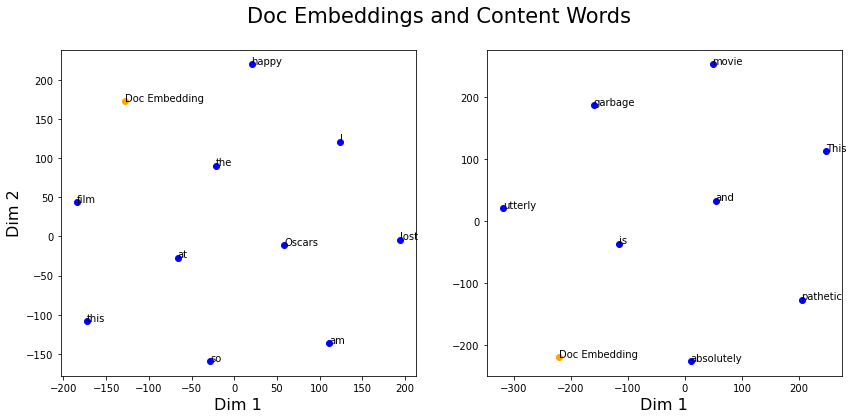

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Doc Embeddings and Content Words', fontsize=title_size + 3)

ax = axes[0]
tokens = np.array(["I", "am", "so", "happy", "this", "film", "lost","at","the","Oscars"])
doc_vec = model.infer_vector(tokens)
token_vecs = wv[tokens]
X_single = np.concatenate([token_vecs, np.expand_dims(doc_vec,axis=0)])

np.random.seed(11)
tsne = TSNE(n_components=2)
X_single_tsne = tsne.fit_transform(X_single)

# TODO: change annotation font size!!!

for idx, (x,y) in enumerate(X_single_tsne[:-1]): 
    ax.scatter(x,y,c="blue")
    ax.annotate(tokens[idx], (x,y))
doc_point = (X_single_tsne[-1, 0], X_single_tsne[-1, 1])
ax.scatter(doc_point[0], doc_point[1],c="orange")
ax.annotate("Doc Embedding", doc_point)
ax.set_xlabel("Dim 1", fontsize=ax_size)
ax.set_ylabel("Dim 2", fontsize=ax_size)

ax = axes[1]

tokens = np.array(["This", "movie", "is", "absolutely", "garbage", "and", "utterly", "pathetic"])
doc_vec = model.infer_vector(tokens)
token_vecs = wv[tokens]
X_single = np.concatenate([token_vecs, np.expand_dims(doc_vec,axis=0)])

np.random.seed(11)
tsne = TSNE(n_components=2)
X_single_tsne = tsne.fit_transform(X_single)

for idx, (x,y) in enumerate(X_single_tsne[:-1]): 
    ax.scatter(x,y,c="blue")
    ax.annotate(tokens[idx], (x,y))
doc_point = (X_single_tsne[-1, 0], X_single_tsne[-1, 1])
ax.scatter(doc_point[0], doc_point[1],c="orange")
ax.annotate("Doc Embedding", doc_point)
ax.set_xlabel("Dim 1", fontsize=ax_size)
# ax.set_ylabel("Dim 2", fontsize=ax_size)


# plt.title(doc, fontsize=10)
plt.savefig(f"contentWords.png", dpi=400, bbox_inches="tight")

In [ ]:
lexicon=SentimentLexicon()
strength_sent_classes = ['weaksubj', 'strongsubj'] # e.g., valence vs. arousal
val_sent_classes = ["positive", "negative"]
lexicon = lexicon.lexicon
lexicon["bad"]

In [ ]:
strength_idxs = {strength_sent_class: [] for strength_sent_class in strength_sent_classes}
val_idxs = {val_sent_class: [] for val_sent_class in val_sent_classes}
for idx, word in enumerate(vocabulary): 
    if word in lexicon: 
        [strength, val] = lexicon.lexicon[word]
        strength_idxs[strength].append(idx)
        val_idxs[val].append(idx)
        
        
fig, axes = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Word Embeddings and Lexical Tags', fontsize=title_size + 3)

corpus_to_plot = mini_corpus # TODO: change to be the IMDB corpus!!!!

wv = model.wv
word_ids = list(range(len(wv)))
X_words = wv[word_ids]

ax = axes[0]

strong_ids = strength_idxs["strongsubj"]
weak_ids = strength_idxs["weaksubj"]
ax.scatter(X_tsne_words[strong_ids, 0], X_tsne_words[strong_ids, 1],label="Strong")
ax.scatter(X_tsne_words[weak_ids, 0], X_tsne_words[weak_ids, 1],label="Weak")
ax.set_xlabel("Dim 1",fontsize=ax_size)
ax.set_ylabel("Dim 2",fontsize=ax_size)
ax.set_title(f"Strong vs. Weak Words",fontsize=title_size) 


ax = axes[1]

pos_ids = strength_idxs["positive"]
neg_ids = strength_idxs["negative"]
ax.scatter(X_tsne_words[pos_ids, 0], X_tsne_words[pos_ids, 1],label="Positive")
ax.scatter(X_tsne_words[neg_ids, 0], X_tsne_words[neg_ids, 1],label="Negative")
ax.set_xlabel("Dim 1",fontsize=ax_size)
ax.set_ylabel("Dim 2",fontsize=ax_size)
ax.set_title(f"Positive vs. Negative Words",fontsize=title_size) 

plt.savefig(f"lexicalTags.png", dpi=400, bbox_inches="tight")

In [28]:
# wv.evaluate_word_analogies(["good"])

TypeError: don't know how to handle uri ['good']

In [103]:
# [' '.join(review) for review in reviews[:5]]